<a href="https://colab.research.google.com/github/Soukainaz/Course-DataScience/blob/main/Deep%20Learning/Ozone_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data and Librairies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
path = '/content/drive/MyDrive/DeepL/'
df = pd.read_csv(path + 'ozone_complet.csv', sep=';')

In [ ]:
df.shape

(1464, 24)

In [ ]:
df.columns

Index(['date', 'maxO3', 'T6', 'T9', 'T12', 'T15', 'T18', 'Ne6', 'Ne9', 'Ne12',
       'Ne15', 'Ne18', 'Vdir6', 'Vvit6', 'Vdir9', 'Vvit9', 'Vdir12', 'Vvit12',
       'Vdir15', 'Vvit15', 'Vdir18', 'Vvit18', 'Vx', 'maxO3v'],
      dtype='object')

# Exploratory Data Analysis

In [ ]:
df.isna().sum()

date       0
maxO3     73
T6         1
T9         1
T12        1
T15        1
T18        1
Ne6        2
Ne9        2
Ne12       2
Ne15       2
Ne18       5
Vdir6      1
Vvit6      1
Vdir9      1
Vvit9      1
Vdir12     1
Vvit12     1
Vdir15     1
Vvit15     1
Vdir18     1
Vvit18     1
Vx         1
maxO3v    73
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.dtypes

date        int64
maxO3      object
T6         object
T9         object
T12        object
T15        object
T18        object
Ne6       float64
Ne9       float64
Ne12      float64
Ne15      float64
Ne18      float64
Vdir6     float64
Vvit6     float64
Vdir9     float64
Vvit9     float64
Vdir12    float64
Vvit12    float64
Vdir15    float64
Vvit15    float64
Vdir18    float64
Vvit18    float64
Vx         object
maxO3v     object
dtype: object

In [ ]:
#Change data type to numeric
for col in df.columns:
  if df[col].dtype == 'O':
    df[col] = df[col].str.replace(',', '.').astype(float)

In [ ]:
#Variable to predict
Y = df['maxO3']
#Features
X = df.iloc[:,2:]

On va pas utiliser la variables temps comme on est pas dans le cas d'une série temporelle

In [ ]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
T6,1366.0,12.298609,3.890976,-1.6000,10.0000,12.7000,15.1,21.7000
T9,1366.0,16.387482,4.100004,4.5000,13.8000,16.7000,19.0,28.6000
T12,1366.0,19.428697,4.897765,5.7000,16.3000,19.4000,22.6,33.5000
T15,1366.0,20.345095,5.245008,5.7000,16.8000,20.4000,23.9,35.5000
T18,1366.0,18.780747,5.046637,4.4000,15.5000,18.6000,22.0,34.1000
Ne6,1366.0,5.012445,2.900902,0.0000,2.0000,6.0000,8.0,9.0000
Ne9,1366.0,5.166179,2.549047,0.0000,3.0000,6.0000,7.0,9.0000
Ne12,1366.0,5.332357,2.313064,0.0000,4.0000,6.0000,7.0,8.0000
Ne15,1366.0,5.142020,2.321811,0.0000,3.0000,6.0000,7.0,8.0000
Ne18,1366.0,4.710835,2.628218,0.0000,2.0000,5.0000,7.0,8.0000


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42, shuffle=True)

In [ ]:
#Standariser la donnée
from sklearn.preprocessing import StandardScaler

scaler_standard = StandardScaler()
X_train_normalized = scaler_standard.fit_transform(X_train)
X_test_normalized = scaler_standard.transform(X_test)

# Régression Linéaire

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_normalized, Y_train)

LinearRegression()

In [ ]:
Y_pred = model.predict(X_test_normalized)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 184.47011988353282
R^2 Score: 0.6656755405565962
Mean Absolute Error: 10.481315574539156


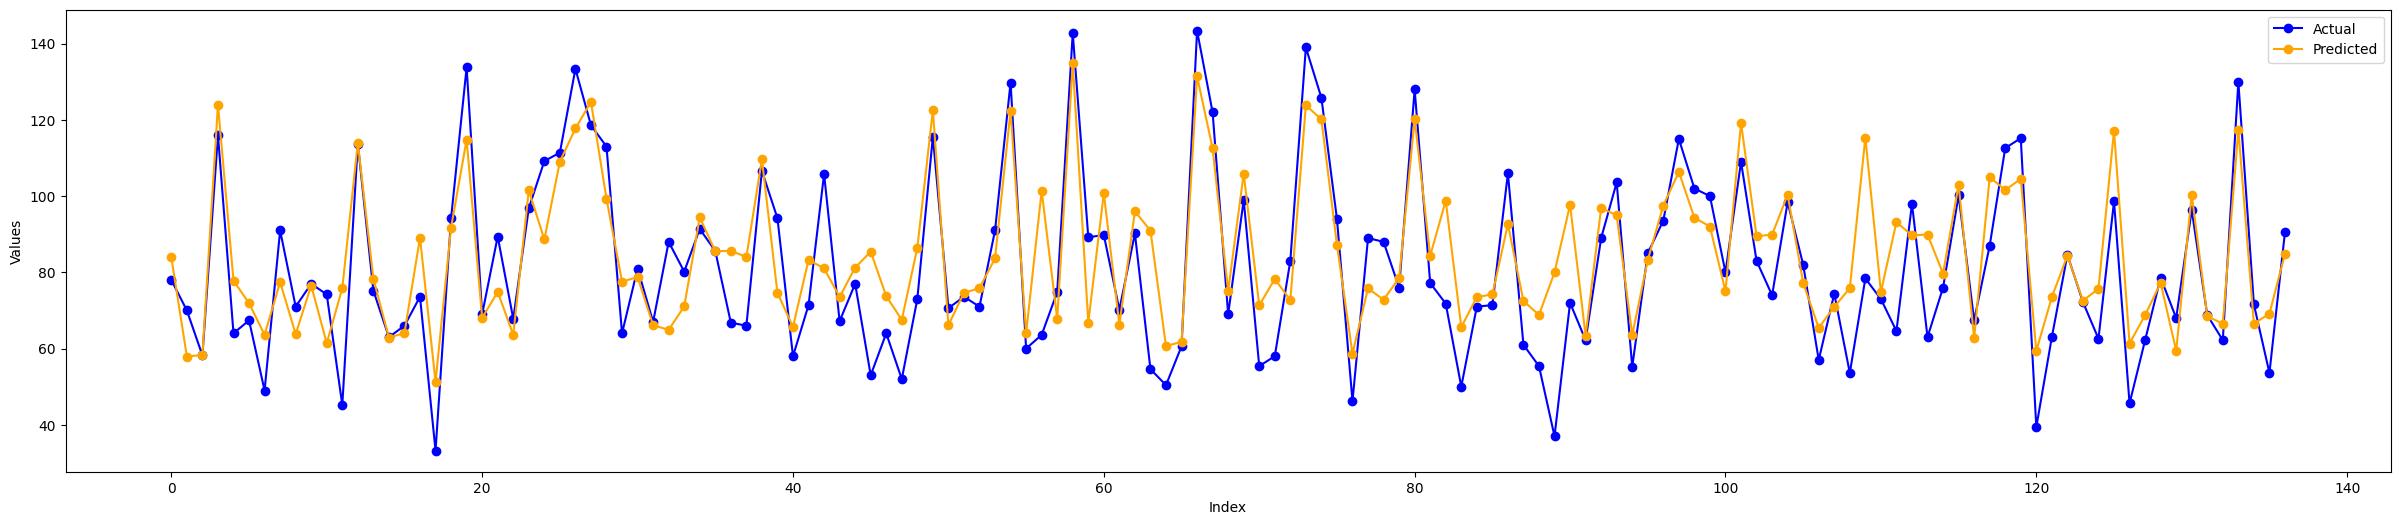

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_values = np.arange(len(Y_test))
plt.figure(figsize=(30, 6))
# Plot the actual values (y_test) in blue
plt.plot(x_values, Y_test, label='Actual', color='blue', marker='o')

# Plot the predicted values (y_predict) in orange
plt.plot(x_values, Y_pred, label='Predicted', color='orange', marker='o')

# Add labels and a legend
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.savefig('comparison_plot_regression_lin.png')
# Show the plot
plt.show()

# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=200, max_depth=2, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_normalized, Y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=200, random_state=42)

In [ ]:
y_pred_gb = gb_model.predict(X_test_normalized)

In [ ]:
mse_gb = mean_squared_error(Y_test, y_pred_gb)
r2_gb = r2_score(Y_test, y_pred_gb)
mae_gb = mean_absolute_error(Y_test, y_pred_gb)

print(f'Mean Squared Error (Gradient Boosting): {mse_gb}')
print(f'R^2 Score (Gradient Boosting): {r2_gb}')
print(f'Mean Absolute Error (Gradient Boosting): {mae_gb}')

Mean Squared Error (Gradient Boosting): 162.66473226750796
R^2 Score (Gradient Boosting): 0.7051945392555945
Mean Absolute Error (Gradient Boosting): 9.776369006610159


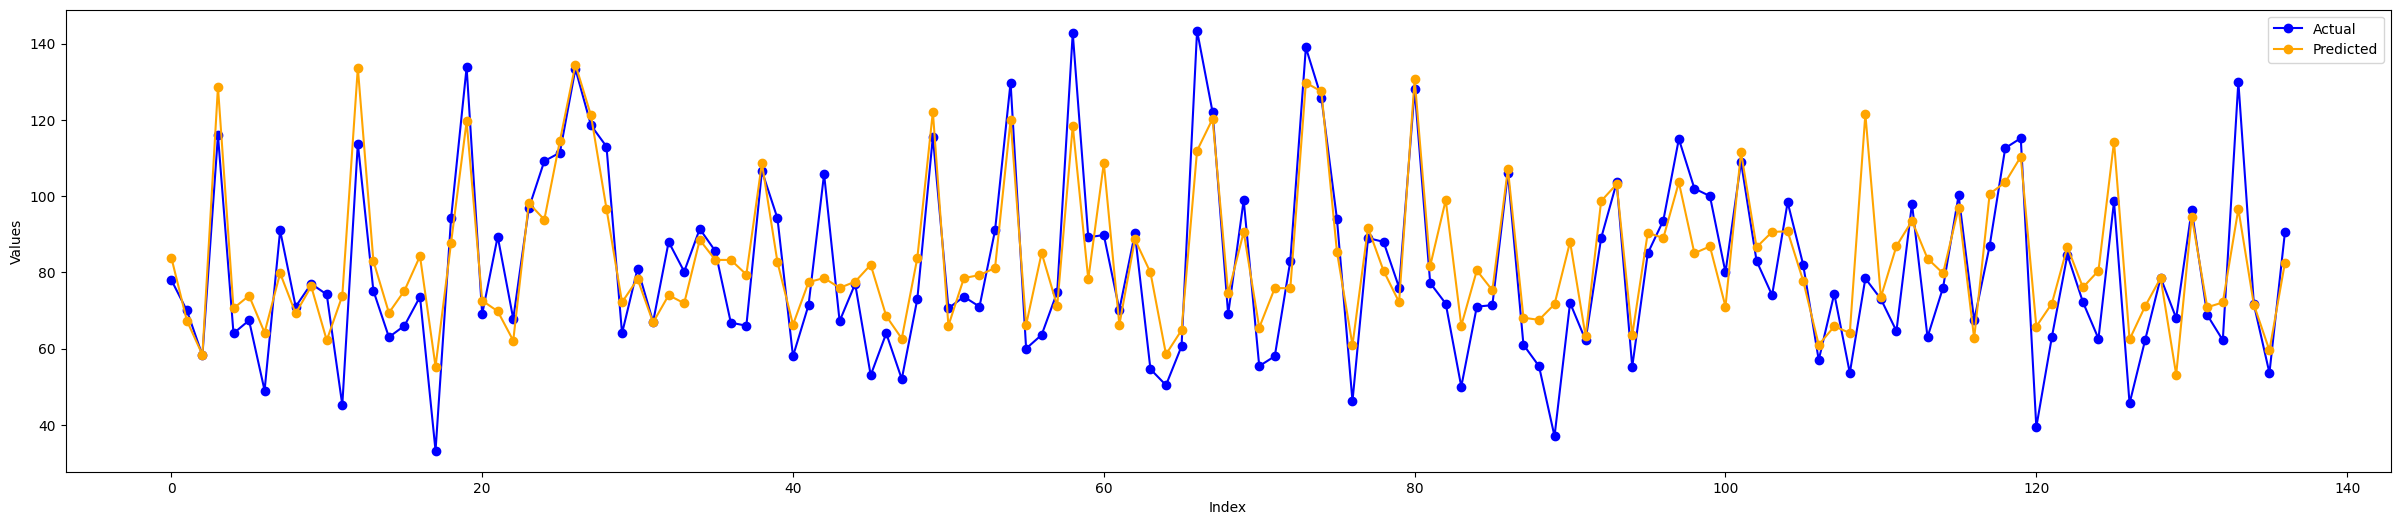

In [ ]:
x_values = np.arange(len(Y_test))
plt.figure(figsize=(30, 6))
# Plot the actual values (y_test) in blue
plt.plot(x_values, Y_test, label='Actual', color='blue', marker='o')

# Plot the predicted values (y_predict) in orange
plt.plot(x_values, y_pred_gb, label='Predicted', color='orange', marker='o')

# Add labels and a legend
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.savefig('comparison_plot_xgboost.png')
# Show the plot
plt.show()

# DNN

In [ ]:
from tensorflow import keras

In [ ]:
input_size = 22
num_layer1 = 100
num_layer2 = 100

model = keras.Sequential([
    keras.layers.Input(input_size, name='Input_layer'),
    keras.layers.Dense(num_layer1, activation='relu', name='Hidden_layer1'),
    keras.layers.Dense(num_layer2, activation='relu', name='Hidden_layer2'),
    keras.layers.Dense(1, name='Output_layer')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer1 (Dense)       (None, 100)               2300      
                                                                 
 Hidden_layer2 (Dense)       (None, 100)               10100     
                                                                 
 Output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 12501 (48.83 KB)
Trainable params: 12501 (48.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])

In [ ]:
hist = model.fit(X_train_normalized,
                 Y_train,
                 batch_size=500,
                 epochs=200)

Epoch 1/200
3/3 [==============================] - 1s 20ms/step - loss: 7825.7544 - mae: 85.3926
Epoch 2/200
3/3 [==============================] - 0s 13ms/step - loss: 7732.8584 - mae: 84.8588
Epoch 3/200
3/3 [==============================] - 0s 9ms/step - loss: 7639.7915 - mae: 84.3190
Epoch 4/200
3/3 [==============================] - 0s 9ms/step - loss: 7541.7607 - mae: 83.7516
Epoch 5/200
3/3 [==============================] - 0s 10ms/step - loss: 7437.3774 - mae: 83.1449
Epoch 6/200
3/3 [==============================] - 0s 10ms/step - loss: 7322.9692 - mae: 82.4758
Epoch 7/200
3/3 [==============================] - 0s 8ms/step - loss: 7196.8740 - mae: 81.7292
Epoch 8/200
3/3 [==============================] - 0s 8ms/step - loss: 7055.7964 - mae: 80.8882
Epoch 9/200
3/3 [==============================] - 0s 9ms/step - loss: 6895.8999 - mae: 79.9317
Epoch 10/200
3/3 [==============================] - 0s 8ms/step - loss: 6714.2827 - mae: 78.8382
Epoch 11/200
3/3 [=================

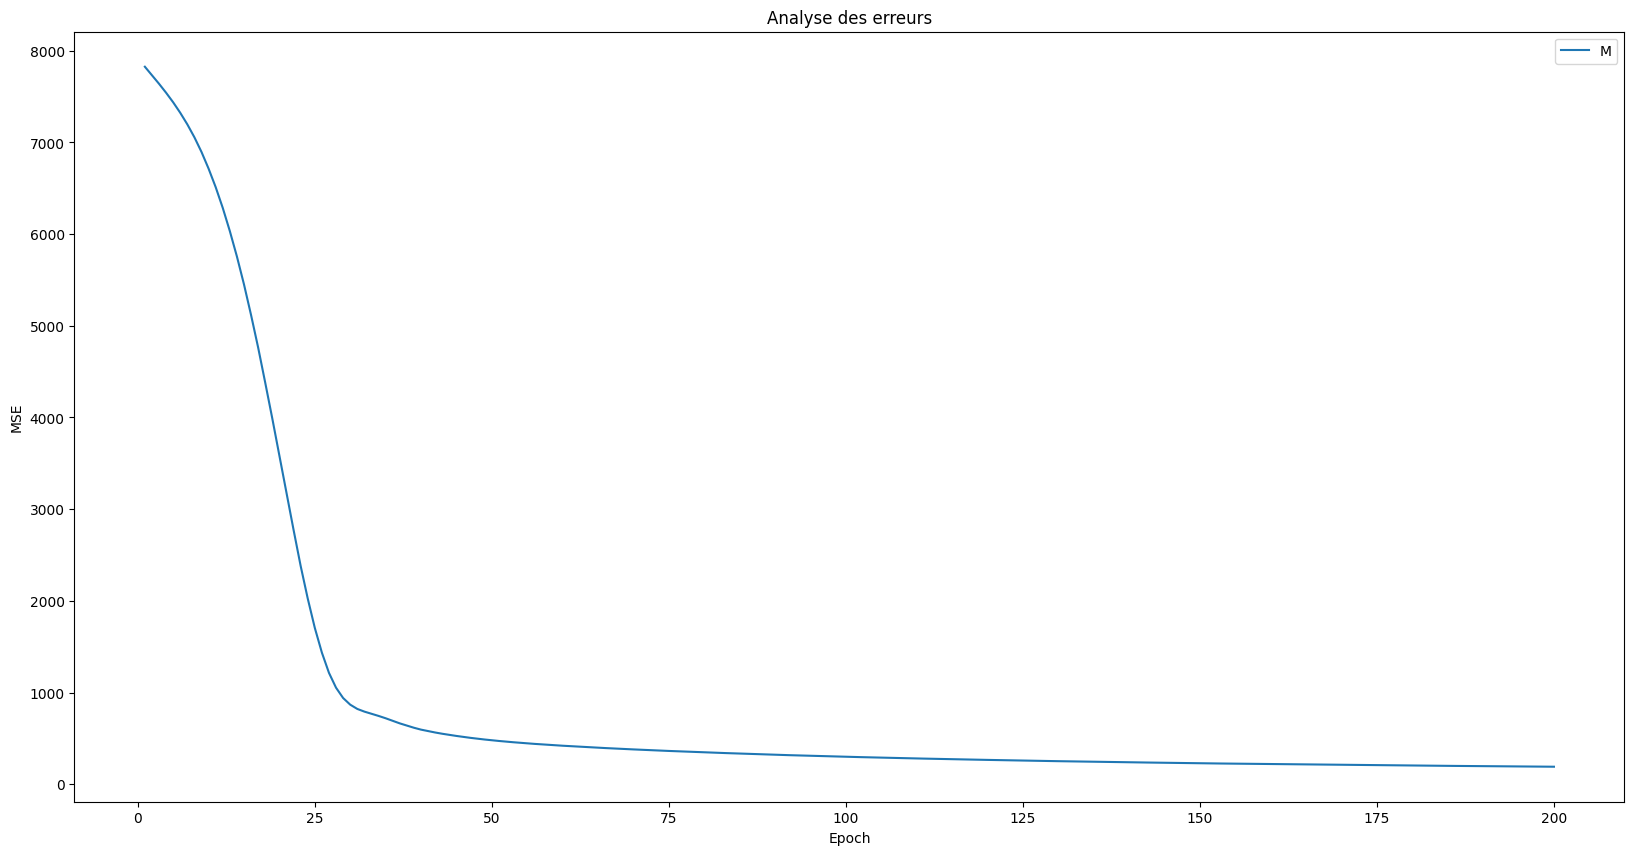

In [ ]:
import matplotlib.pyplot as plt

figure = plt.gcf()
figure.set_size_inches((20, 10))
plt.title('Analyse des erreurs')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.plot(range(1, len(hist.history['loss']) + 1), hist.history['loss'])
plt.legend('MSE')
plt.show()

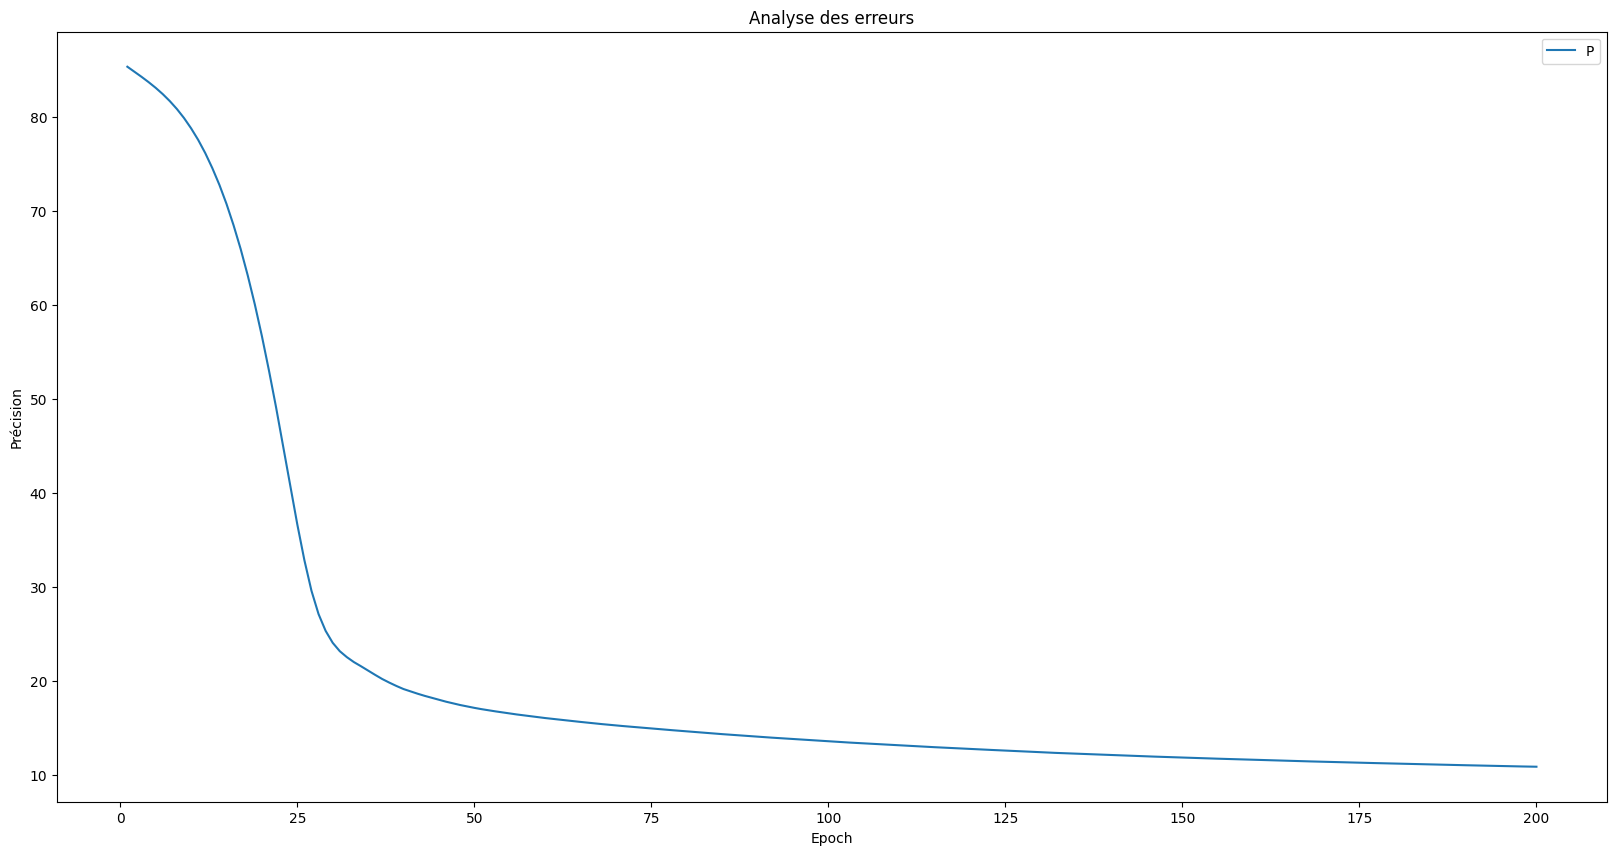

In [ ]:
figure = plt.gcf()
figure.set_size_inches((20, 10))
plt.title('Analyse des erreurs')
plt.xlabel('Epoch')
plt.ylabel('Précision')
plt.plot(range(1, len(hist.history['mae']) + 1), hist.history['mae'])
plt.legend('Précision apprentissage')
plt.show()

In [ ]:
y_pred_dnn = model.predict(X_test_normalized)

5/5 [==============================] - 0s 2ms/step


In [ ]:
mse_dnn = mean_squared_error(Y_test, y_pred_dnn)
r2_dnn = r2_score(Y_test, y_pred_dnn)
mae_dnn = mean_absolute_error(Y_test, y_pred_dnn)

print(f'Mean Squared Error (DNN): {mse_dnn}')
print(f'R^2 Score (DNN): {r2_dnn}')
print(f'Mean Absolute Error (DNN)): {mae_dnn}')

Mean Squared Error (DNN): 225.76351046885847
R^2 Score (DNN): 0.590837455696346
Mean Absolute Error (DNN)): 12.147318512853914


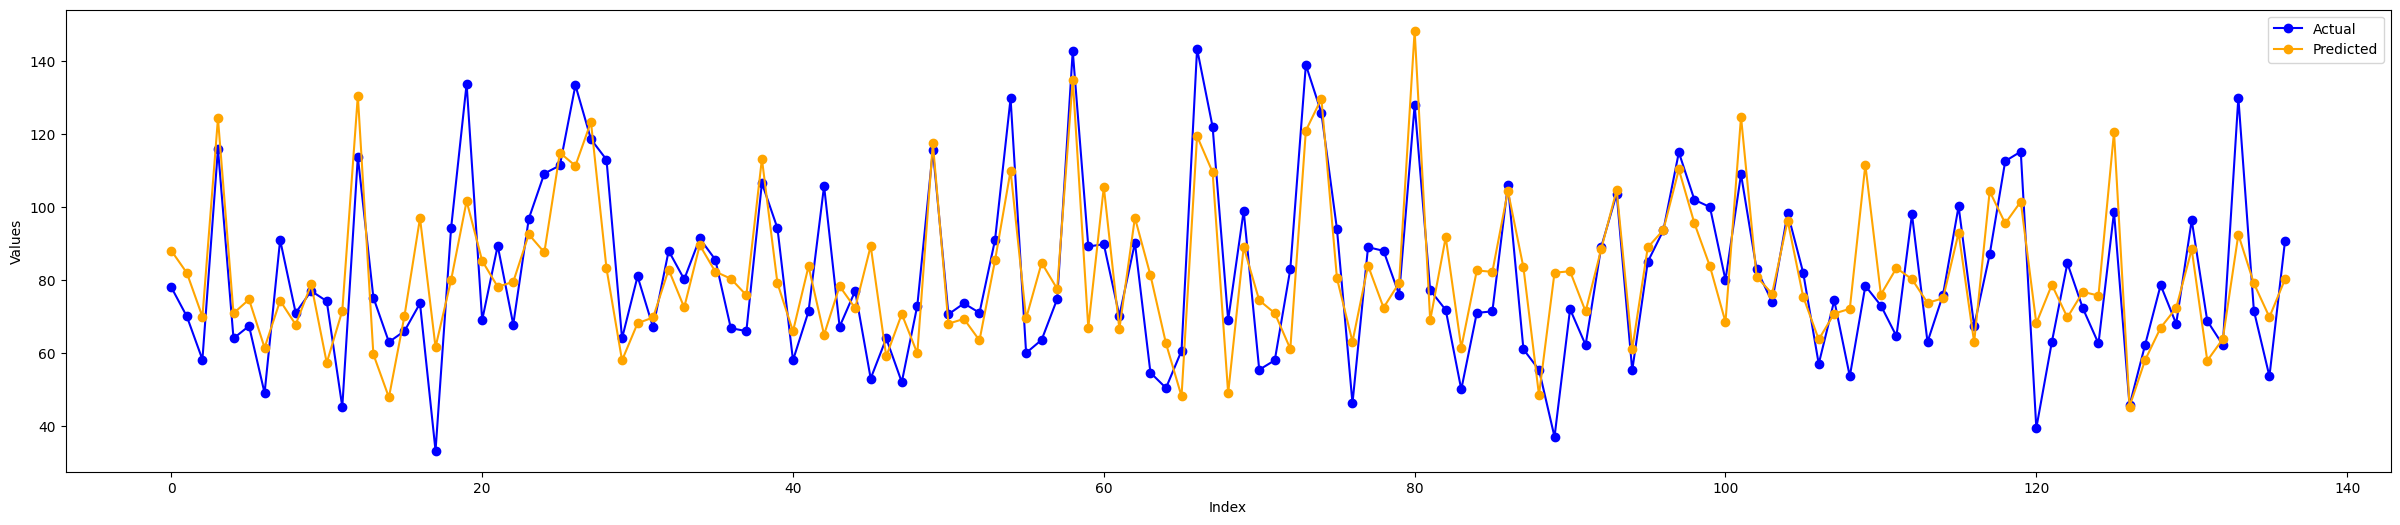

In [ ]:
x_values = np.arange(len(Y_test))
plt.figure(figsize=(30, 6))
# Plot the actual values (y_test) in blue
plt.plot(x_values, Y_test, label='Actual', color='blue', marker='o')

# Plot the predicted values (y_predict) in orange
plt.plot(x_values, y_pred_dnn, label='Predicted', color='orange', marker='o')

# Add labels and a legend
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.savefig('comparison_plot_dnn.png')
# Show the plot
plt.show()